
# Hypothesis Testing 


## **Concepts Covered:**

- <a href = #link1>Hypothesis Test for Population Mean $\mu$</a>
- <a href = #link2>One-tailed and Two-tailed Tests</a>
- <a href = #link3>Hypothesis Testing via the Confidence Interval (CI) Approach</a>
- <a href = #link4>Simulation: Confidence Interval Coverage </a>
- <a href = #link5>How to Choose the Significance Level </a>




### Preliminary:  Command to install the latest version Scipy in the system


In [ ]:
#!pip install scipy==1.6.1
import scipy
scipy.__version__

'1.12.0'

### Import the required packages

In [3]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

## 🧪 Hypothesis Testing

**Hypothesis testing** is a statistical method used to make decisions or inferences about a population parameter based on sample data. It provides a formal framework to test whether there is enough evidence in the data to support a specific claim.

---

### 🔑 Key Concepts

1. **Null Hypothesis ($H_0$):**  
   The default assumption — usually states that there is *no effect* or *no difference*.  
   Example: $H_0 : \mu = 100$

2. **Alternative Hypothesis ($H_1$ or $H_a$):**  
   Represents what we want to test for — states that there *is an effect* or *a difference*.  
   Example: $H_a : \mu \neq 100$

3. **Test Statistic:**  
   A standardized value computed from the sample data that is used to decide whether to reject $H_0$.  
   Example: $z$-score or $t$-score.

4. **Significance Level ($\alpha$):**  
   The probability of rejecting $H_0$ when it is actually true (Type I error).  
   Common choices: $\alpha = 0.05$ or $0.01$.

5. **p-value:**  
   The probability of observing a test statistic as extreme as (or more extreme than) the one calculated from the sample, assuming $H_0$ is true.  
   - If $p \leq \alpha$ → Reject $H_0$  
   - If $p > \alpha$ → Fail to reject $H_0$

6. **Decision Rule:**  
   Based on comparing the test statistic with a critical value or the p-value with $\alpha$.

---

### 📝 Steps in Hypothesis Testing

1. State $H_0$ and $H_a$.  
2. Choose a significance level $\alpha$.  
3. Collect data and compute the test statistic.  
4. Calculate the p-value (or critical region).  
5. Make a decision: Reject or fail to reject $H_0$.  
6. Interpret the results in context.

---

👉 Hypothesis testing is widely used in **machine learning** (e.g., feature significance in regression), **A/B testing**, and **scientific research**.


### 🅰️🆎 A/B Testing

**A/B testing** is a statistical experiment that compares two versions of a product, feature, or process — **Group A (control)** and **Group B (treatment)** — to determine which performs better on a chosen metric (e.g., conversion rate, click-through rate). Users are randomly assigned to each group, and a **hypothesis test** is performed with $H_0: p_A = p_B$ versus $H_a: p_A \neq p_B$. If the observed difference is statistically significant (p-value $\leq \alpha$), we conclude that one version outperforms the other, making A/B testing a powerful tool for **data-driven decision making** in business, marketing, and machine learning.

✅ — **A/B testing** is widely used in marketing to identify which version of a campaign, message, or design is more effective. For example, marketers may test two different **email subject lines**, **website landing pages**, or **advertisement designs** by randomly assigning users to **Group A (control)** and **Group B (treatment)**. The outcome metric could be **open rate**, **click-through rate**, or **conversion rate**. By applying hypothesis testing to the results, marketers can determine whether observed differences are statistically significant, allowing them to make **evidence-based decisions** and optimize their strategies.



## 🔢 1. Hypothesis Test for Population Mean

A **hypothesis test for a population mean** is used when we want to determine if the average value of a population is equal to, greater than, or less than some hypothesized value.

---

### 🔍 Step 1: Define Hypotheses
- **Null hypothesis ($H_0$):** The population mean equals a specific value.  
  $$
  H_0 : \mu = \mu_0
  $$
- **Alternative hypothesis ($H_a$):** The population mean differs from the hypothesized value.  
  - Two-tailed: $$H_a : \mu \neq \mu_0$$  
  - Left-tailed: $$H_a : \mu < \mu_0$$  
  - Right-tailed: $$H_a : \mu > \mu_0$$  

---

### 🔍 Step 2: Test Statistic
If the population standard deviation $\sigma$ is known, we use a **z-test**:

$$
z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
$$

If $\sigma$ is unknown (common in practice), we use a **t-test** with sample standard deviation $s$:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

---

### 🔍 Step 3: Decision Rule
- Compute the **p-value** associated with the test statistic.  
- Compare with the significance level $\alpha$:  
  - If $p \leq \alpha$, reject $H_0$.  
  - If $p > \alpha$, fail to reject $H_0$.

---
### 📐 Computing the Sample Standard Deviation ($s$)

When the population standard deviation ($\sigma$) is **unknown**, we estimate it with the **sample standard deviation** ($s$), which measures the spread of the sample data around the sample mean.

---

### 🔍 Formula
For a sample of size $n$ with observations $x_1, x_2, \dots, x_n$ and sample mean $\bar{x}$:

$$
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}
$$

---

### 🔑 Key Points
- The denominator uses **$n-1$** instead of $n$ (this is called **Bessel’s correction**) to make $s$ an **unbiased estimator** of the population standard deviation $\sigma$.  
- $s$ represents the **average distance** of sample data points from the mean.  
- Once $s$ is computed, it is used in the **t-test** formula for hypothesis testing when $\sigma$ is not known.

---

👉 In short, $s$ is calculated as the **square root of the sample variance**.




### 🧪 One-Sample Z-Test (When Population Standard Deviation is Known)

A **one-sample Z-test** is used to test a hypothesis about a population mean when the **population standard deviation** ($\sigma$) is known. Although this situation is uncommon in practice, it is useful for illustrating the logic of hypothesis testing.

---



👉 While knowing $\sigma$ is rare, the one-sample Z-test is conceptually important because it forms the foundation for more general tests like the **t-test**.


----

### 🧪 Example: Mean Delivery Time (Right-Tailed)

It is known from experience that for a certain E-commerce company the mean delivery time of the products is 5 days with a standard deviation of 1.3 days.

The new customer service manager of the company is afraid that the company is slipping and collects a random sample of 45 orders. The mean delivery time of these samples comes out to be 5.25 days.

Is there enough statistical evidence for the manager’s apprehension that the mean delivery time of products is greater than 5 days?

Use level of significance $\alpha$ = 0.05.

----

### Let's write the null hypothesis and alternate hypothesis

Let $\mu$ be the mean delivery time of the products.

The manager will test the null hypothesis

>$H_0: \mu = 5$

against the alternate hypothesis

> $H_a: \mu > 5$

### Are the assumptions of the Z-test satisfied?

### ✅ Conditions for Using a One-Sample Z-Test

- **Approximate normality of $\bar{X}$:** The sample size is $n=45>30$, so by the **Central Limit Theorem** the sampling distribution of the mean is approximately normal even if the population is not strictly normal. (With smaller $n$, a Z-test would still be valid if the population were known to be normal.)
- **Simple random sample:** The observations come from a **simple random sample**, as stated.
- **Known standard deviation:** The population standard deviation is known, $\sigma=1.3$.

**Conclusion:** All three conditions are satisfied, so a **one-sample Z-test** is appropriate for testing $H_0:\ \mu=5$ against $H_a:\ \mu>5$ at the chosen $\alpha=0.05$.


### The next step is to find the Z test statistic

In [5]:
# set the values of population mean and population standard deviation to 5 and 1.3 respectively
mu, sigma = 5, 1.3

# set the value of sample mean to 5.25
x_bar = 5.25

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(45))
test_stat

1.2900392177883402

#### The Z test statistic follows a standard normal distribution.

Let's plot the distribution of the Z test statistic and see where the computed test statistic lies in the plot.

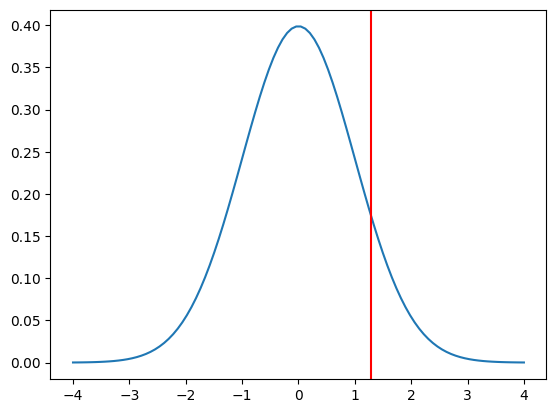

In [7]:
# import the required function
from scipy.stats import norm

# plotting the distribution of Z test statistic along with the test statistic
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
plt.show()

What is the probability of getting the calculated value of test statistic or bigger in the above distribution?

In [8]:
1 - norm.cdf(test_stat)

0.09851852092578695

**Though the probability is very small, is it significant enough to reject the null hypothesis in favor of the alternate hypothesis?**

### 🎯 Introduction to Rejection Region / p-value

When performing hypothesis testing, calculating the **test statistic** alone is not enough to decide whether to reject the null hypothesis. We need a decision rule to determine if the observed evidence is statistically significant. Two common approaches are used:

---

### 1️⃣ Rejection Region Approach
- Define a **critical value** based on the chosen significance level $\alpha$ (e.g., $z_{0.05}=1.645$ for a one-tailed test at $\alpha=0.05$).  
- If the test statistic falls in the **rejection region** (beyond the critical value), we reject $H_0$.  
- Otherwise, we fail to reject $H_0$.

---

### 2️⃣ p-value Approach
- The **p-value** is the probability of obtaining a test statistic as extreme as (or more extreme than) the observed value, assuming $H_0$ is true.  
- Decision rule:  
  - If $p \leq \alpha$, reject $H_0$.  
  - If $p > \alpha$, fail to reject $H_0$.

---

👉 Both approaches lead to the **same decision** — the rejection region approach uses critical values, while the p-value approach uses probabilities. The p-value method is more widely used in practice because it provides a direct measure of the strength of evidence against $H_0$.


### 🚫 Rejection Region Approach

In hypothesis testing, the **rejection region** defines the set of values of the test statistic for which we reject the null hypothesis $H_0$.

---

### 🔍 Key Idea
In our example, the **Z test statistic** follows a **standard normal distribution**. Values of $Z$ lying at the far **right end** of the distribution provide strong evidence against $H_0$ because the alternative hypothesis is one-tailed ($H_a: \mu > 5$).

---

### 📌 Critical Value
To determine the rejection region, we find the **critical value** $z_{\alpha}$ such that the area under the standard normal curve **to the right** of $z_{\alpha}$ equals the significance level $\alpha$:

$$
P(Z > z_{\alpha}) = \alpha
$$

Thus, the **rejection region** is:

$$
Z > z_{\alpha}
$$

---

### ✅ Example
For $\alpha = 0.05$ in a right-tailed test:

$$
z_{0.05} = 1.645
$$

So we reject $H_0$ if:

$$
Z > 1.645
$$

This means that only test statistics far enough in the right tail (beyond 1.645) provide sufficient evidence to reject the null hypothesis.


In [9]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(1-.05)
critical_val

1.6448536269514722

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

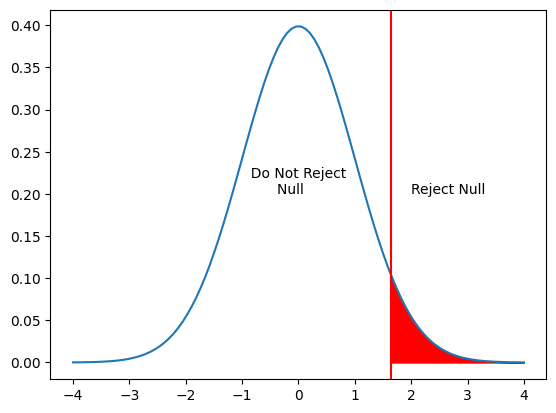

In [10]:
# plotting the test statistic distribution and indicating the rejection and acceptance region
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(critical_val, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (2, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

### Insight

As our test statistic (~ 1.29) does not lie in the rejection region, we can not reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

### 📊 p-value Approach

While the rejection region approach provides a clear decision, it does not indicate the **strength of the evidence** against the null hypothesis. For this reason, statisticians often prefer the **p-value approach**, which quantifies how strongly the sample data contradicts $H_0$.

---

### 🔑 Steps in the p-value Approach
1. **Choose the significance level** ($\alpha$).  
2. **Compute the p-value**, which is the probability of obtaining the observed test statistic (or one more extreme) under $H_0$.  
3. **Decision rule:**  
   - If $p \leq \alpha$, reject $H_0$.  
   - If $p > \alpha$, fail to reject $H_0$.

---

### 🔍 Interpretation
- The **p-value** is a probability that directly measures the evidence against $H_0$.  
- A **smaller p-value** indicates **stronger evidence** against $H_0$.  

---

### 📌 Example Context
In the delivery time example, the p-value corresponds to the **area to the right of the calculated test statistic** under the **standard normal distribution**, since the alternative hypothesis is right-tailed ($H_a : \mu > 5$).


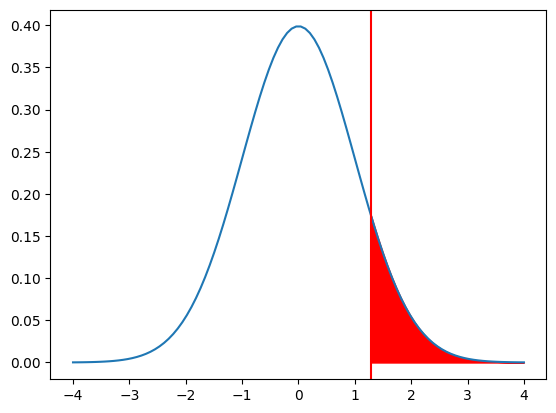

In [11]:
# plotting the test statistic distribution along with computed test statistic
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
x1 = np.linspace(test_stat, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.show()

In [12]:
# calculate the p-value
1 - norm.cdf(test_stat)

0.09851852092578695

### Insight

As the p-value ~0.098 is greater than the level of significance, we can not reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

### Key Takeaway

* We get the same result by using both the Rejection Region and p-value approach that the manager does not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

## 🎯 2. One-Tailed and Two-Tailed Tests

In hypothesis testing, the choice between a **one-tailed** or **two-tailed** test depends on the form of the **alternative hypothesis ($H_a$)**.

---

### 1️⃣ One-Tailed Test
- Used when we are testing for a difference in **only one direction**.  
- **Right-tailed test:**  
  $$
  H_0: \mu \leq \mu_0 \quad \text{vs.} \quad H_a: \mu > \mu_0
  $$
  Reject $H_0$ if $Z > z_{\alpha}$.
- **Left-tailed test:**  
  $$
  H_0: \mu \geq \mu_0 \quad \text{vs.} \quad H_a: \mu < \mu_0
  $$
  Reject $H_0$ if $Z < -z_{\alpha}$.

---

### 2️⃣ Two-Tailed Test
- Used when we are testing for a difference in **either direction**.  
- Hypotheses:
  $$
  H_0: \mu = \mu_0 \quad \text{vs.} \quad H_a: \mu \neq \mu_0
  $$
- The rejection region is split between the two tails:
  $$
  |Z| > z_{\alpha/2}
  $$
- Example: For $\alpha = 0.05$, the critical values are $z_{\alpha/2} = \pm 1.96$.

---

### ✅ Summary
- **One-tailed test:** Looks for evidence of deviation in a **specific direction**.  
- **Two-tailed test:** Looks for evidence of deviation in **either direction**.  
The choice must be made **before** analyzing the data, based on the research question.


### 🥤 Example: One-Tailed vs Two-Tailed Test

Suppose a soft-drink manufacturer’s most popular product is a **600 ml coke** with a standard deviation of 50 ml.

- A **customer** wants to check whether there is **at least 600 ml** in the bottle, suspecting that the amount is **less** than 600 ml.  
  - Null hypothesis:  
    $$
    H_0: \mu = 600
    $$
  - Alternative hypothesis:  
    $$
    H_a: \mu < 600
    $$
  👉 This is a **one-tailed (left-tailed) test**.

---

- The **quality control team**, however, wants to ensure that the amount is **exactly 600 ml**, i.e., not higher and not lower.  
  - Null hypothesis:  
    $$
    H_0: \mu = 600
    $$
  - Alternative hypothesis:  
    $$
    H_a: \mu \neq 600
    $$
  👉 This is a **two-tailed test**.

---

### ✅ Conclusion
The choice between a **one-tailed** and **two-tailed** test depends entirely on the research question:
- If we care about **only one direction** of deviation (e.g., less than 600 ml), we use a **one-tailed test**.  
- If we care about **any difference** (e.g., not equal to 600 ml), we use a **two-tailed test**.


### 🧪 Two-Tailed Z-Test — Coke Fill Volume

Suppose you work on the quality control team of the company. It is known from experience that the mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml.

You have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

You intend to test whether the amount of coke in the bottle is different from 600 ml using a 0.05 level of significance. Do you have enough Statistical evidence for it?

### ✅ Are the Assumptions of the Z-Test Satisfied?

- **Approximate normality of $\bar{X}$:** The sample size is $n=36>30$, so by the **Central Limit Theorem** the sampling distribution of the mean is approximately normal. (If $n<30$, a Z-test would still be valid **if** the population is known to be normal.)
- **Simple random sampling:** The observations come from a **simple random sample**, as stated.
- **Known standard deviation:** The population standard deviation is known, $\sigma=50$ ml.

**Conclusion:** All assumptions hold, so a **one-sample Z-test** for $H_0:\ \mu=600$ is appropriate.


### The next step is to find the test statistic

In [14]:
# set the values of population mean and standard deviation to 600 and 50 respectively.
mu, sigma = 600, 50

# set the value of sample mean to 580.
x_bar = 580

# calculate the test statistic.
test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
test_stat

-2.4

### Let's use the rejection region approach for the two-tailed test

In the given example, the Z test statistic follows a standard normal distribution. The Z values lying at the left and right end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the values of Z (called critical values) that give an area of $\alpha/2$ to both the left and right end.

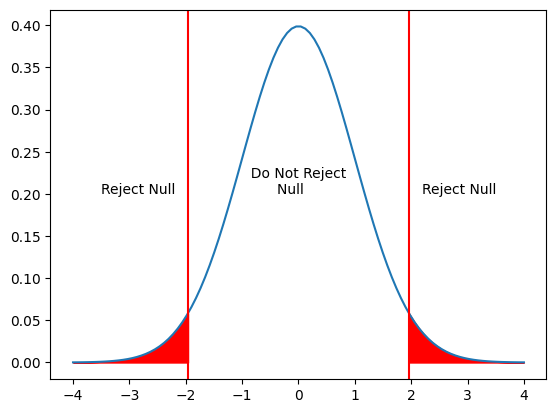

In [15]:
# import the required function
from scipy.stats import norm

# find the critical values
critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)

# plot the rejection and acceptance region
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val1, c = 'r')
x1 = np.linspace(critical_val1, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.axvline(x = critical_val2, c = 'r')
x1 = np.linspace(-4, critical_val2, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (2.2, 0.20))
plt.annotate('Reject Null', (-3.5, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is different from 600 ml.

###  🧪 One-Tailed Z-Test — Is the Mean Fill < 600 ml?

It is known that the mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml. Suppose you are a customer who wants to test whether the amount of coke in the bottle is less than 600 ml.

You have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

Do you have enough Statistical evidence for it?

### ✅ Are the Assumptions of the Z-Test Satisfied?

- **Approximate normality of $\bar{X}$:** The sample size is $n=36>30$, so by the **Central Limit Theorem** the sampling distribution of the mean is approximately normal. (If $n<30$, a Z-test would still be valid **if** the population is known to be normal.)
- **Simple random sampling:** The observations come from a **simple random sample**, as stated.
- **Known standard deviation:** The population standard deviation is known, $\sigma=50$ ml.

**Conclusion:** All assumptions hold, so a **one-sample Z-test** for $H_0:\ \mu=600$ is appropriate.


### The next step is to find the test statistic

In [16]:
# set the values of population mean and standard deviation to 600 and 50 respectively
mu, sigma = 600, 50

# set the value of sample mean to 580
x_bar = 580

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
test_stat

-2.4

### Let's use the rejection region approach for the one-tailed test

In the given example, the Z test statistic follows a standard normal distribution. The Z values lying at the left end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the left end.

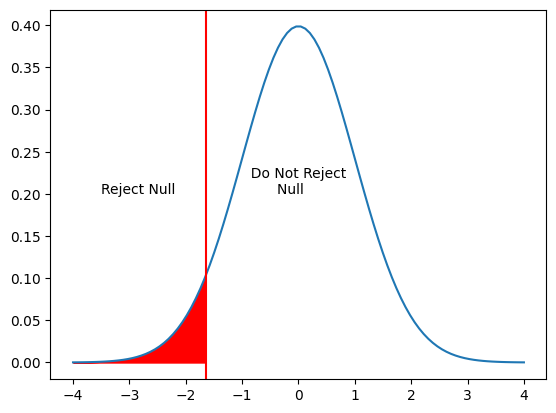

In [17]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

# plot the rejection and acceptance region
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(-4, critical_val, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (-3.5, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is less than 600 ml.

### Key Takeaways

* In the one-tailed test, we consider the difference only in one direction. However, in the two-tailed test, we are interested to know the direction of the difference.
* Depending on the nature of the problem choose one!

----
## 🔎 3. Hypothesis Testing via the Confidence Interval (CI) Approach

The CI approach reaches the **same decision** as the p‑value/critical value methods by checking whether the hypothesized mean lies **inside or outside** an appropriate confidence interval.

---

### 📌 Setup (known $\sigma$)
Given $\,\sigma=50\,$, $\,n=36\,$, and sample mean $\,\bar{x}=580\,$.  
Standard error: $$\text{SE}=\frac{\sigma}{\sqrt{n}}=\frac{50}{\sqrt{36}}=\frac{50}{6}\approx 8.333.$$

---

### 1) Two‑tailed test: $\,H_0:\mu=600\,$ vs $\,H_a:\mu\neq 600\,$ at $\alpha=0.05$

Construct the **95% two‑sided CI** for $\mu$:
$$
\bar{x}\ \pm\ z_{\alpha/2}\,\text{SE}
\;=\;
580\ \pm\ 1.96\cdot 8.333
\;=\;
580\ \pm\ 16.33
\;=\;
(563.67,\ 596.33).
$$

**Decision rule (CI approach):** Reject $H_0$ if $\,\mu_0\,$ lies **outside** the CI.

Here $\,\mu_0=600\,$ is **outside** $(563.67,596.33)$, so we **reject $H_0$**.  
(Consistent with the earlier two‑tailed Z‑test.)

---

### 2) Left‑tailed test: $\,H_0:\mu=600\,$ vs $\,H_a:\mu<600\,$ at $\alpha=0.05$

Use the **one‑sided upper $(1-\alpha)$ CI**:
$$
(-\infty,\ \bar{x}+z_{1-\alpha}\,\text{SE}]
\;=\;
(-\infty,\ 580+1.645\cdot 8.333]
\;=\;
(-\infty,\ 593.71].
$$

**Decision rule (CI approach):** Reject $H_0$ if the **upper one‑sided bound** is **below** $\mu_0$.

Since $\,593.71<600\,$, we **reject $H_0$** (evidence that $\mu<600$).  
(Consistent with the earlier one‑tailed Z‑test.)

---

### ✅ Takeaway
- **Two‑tailed tests:** $\mu_0$ outside the **two‑sided CI** ⇒ reject $H_0$.  
- **One‑tailed tests:** compare $\mu_0$ to the appropriate **one‑sided CI bound** (upper for $H_a:\mu<\mu_0$, lower for $H_a:\mu>\mu_0$).


## 🎯 4. Simulation: Confidence Interval Coverage (Known $\sigma$)

We will:
1) Draw a sample of size $n=36$ from $\mathcal{N}(\mu=600,\ \sigma=50)$  
2) Compute a **95% two‑sided** CI using the **Z** formula (known $\sigma$):  
$$
\bar{X}\ \pm\ z_{0.975}\,\frac{\sigma}{\sqrt{n}},\quad z_{0.975}=1.96
$$
3) Repeat steps (1)–(2) **100 times**, and **plot all intervals** against the true mean $\mu=600$ to visualize that some intervals **do not** contain the true parameter.

---

### 🧮 Key quantities
- Standard error: 
$$
\text{SE}=\frac{\sigma}{\sqrt{n}}=\frac{50}{\sqrt{36}}=\frac{50}{6}\approx 8.333
$$
- 95% CI for each replication $r$:  
$$
\text{CI}_r = \left[\ \bar{X}_r - 1.96\cdot \text{SE}\ ,\ \bar{X}_r + 1.96\cdot \text{SE}\ \right]
$$

---



In [18]:
# Reproducibility
rng = np.random.default_rng(42)

# Parameters
mu = 600
sigma = 50
n = 36
R = 100               # number of replications
z = 1.96              # 95% two-sided z critical
SE = sigma / np.sqrt(n)

# Storage
means = np.empty(R)
lower = np.empty(R)
upper = np.empty(R)
covers = np.empty(R, dtype=bool)


In [21]:

# Simulate and build CIs
for r in range(R):
    x = rng.normal(loc=mu, scale=sigma, size=n)
    xbar = x.mean()
    L = xbar - z * SE
    U = xbar + z * SE
    means[r] = xbar
    lower[r] = L
    upper[r] = U
    covers[r] = (L <= mu) and (mu <= U)

coverage_rate = covers.mean()
print(coverage_rate)


0.95


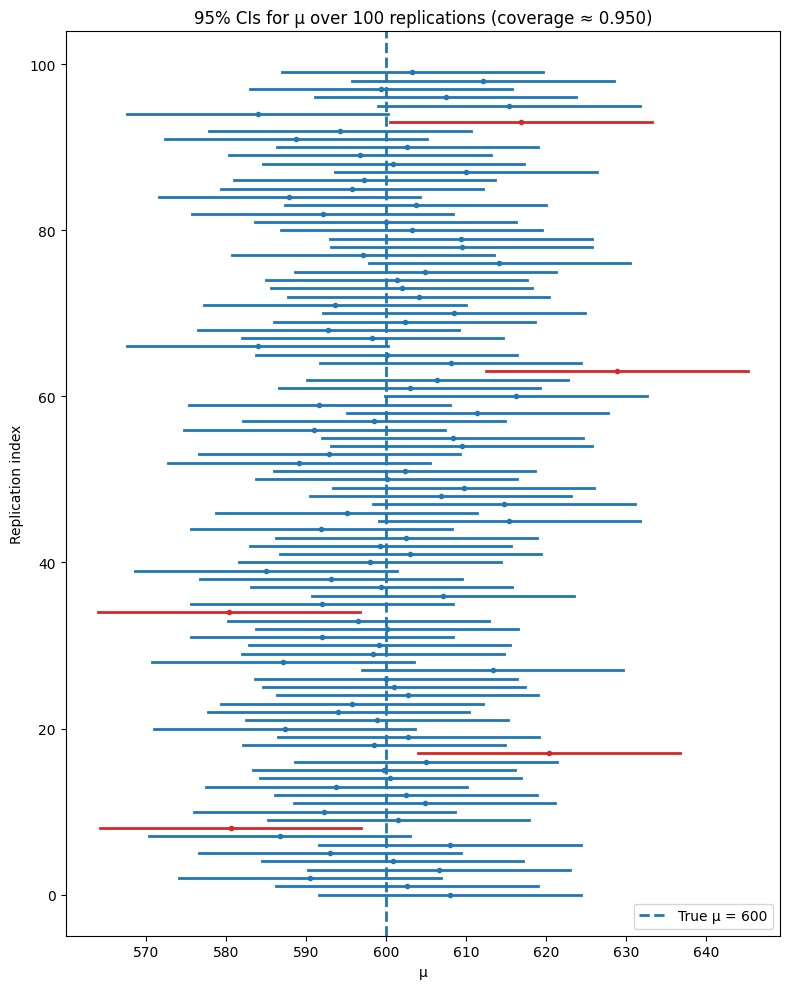

In [22]:

# Plot intervals with highlight for misses
plt.figure(figsize=(8, 10))
y = np.arange(R)
for i in range(R):
    color = "tab:blue" if covers[i] else "tab:red"
    plt.plot([lower[i], upper[i]], [i, i], color=color, linewidth=2)
    plt.plot(means[i], i, marker="o", markersize=3, color=color)

# True mean line
plt.axvline(mu, linestyle="--", linewidth=2, label=f"True μ = {mu}")

plt.title(f"95% CIs for μ over {R} replications (coverage ≈ {coverage_rate:.3f})")
plt.xlabel("μ")
plt.ylabel("Replication index")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## 🎯 5. How to Choose the Significance Level ($\alpha$)

The **significance level** $\alpha$ represents the probability of making a **Type I error** — rejecting the null hypothesis $H_0$ when it is actually true. Choosing $\alpha$ is a critical step in hypothesis testing, and the choice depends on the **context** of the problem.

---

### 🔑 Common Choices
- **$\alpha = 0.05$ (5%)**  
  The most widely used standard in practice. Balances the risks of Type I and Type II errors.
- **$\alpha = 0.01$ (1%)**  
  Used when stronger evidence is required to reject $H_0$, e.g., in medical trials or safety-critical studies.
- **$\alpha = 0.10$ (10%)**  
  Sometimes used in exploratory research where missing a potential effect (Type II error) is considered more costly than a false alarm.

---

### ⚖️ Factors to Consider
1. **Consequences of Type I Error (False Positive):**  
   - If rejecting $H_0$ incorrectly has **serious consequences** (e.g., approving a harmful drug), choose a **smaller $\alpha$**.
   
2. **Consequences of Type II Error (False Negative):**  
   - If failing to reject $H_0$ when $H_a$ is true is more serious (e.g., missing signs of a disease outbreak), a **larger $\alpha$** may be acceptable.

3. **Field Standards:**  
   - Different fields have conventions:  
     - **Medicine, biology:** often $\alpha=0.01$ or lower.  
     - **Social sciences, business:** typically $\alpha=0.05$.  
     - **Exploratory ML/AB testing:** sometimes $\alpha=0.10$.

---

### ✅ Key Takeaway
The choice of $\alpha$ is **not arbitrary**: it balances the risk of false positives and false negatives. Lower $\alpha$ reduces false positives but increases false negatives, and vice versa. Always set $\alpha$ **before** collecting data to avoid bias.
